## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/btc.csv')
df.head()

,Date,Close
0,7/2/2018,6614.180176
1,7/3/2018,6529.589844
2,7/4/2018,6597.549805
3,7/5/2018,6639.140137
4,7/6/2018,6673.500000


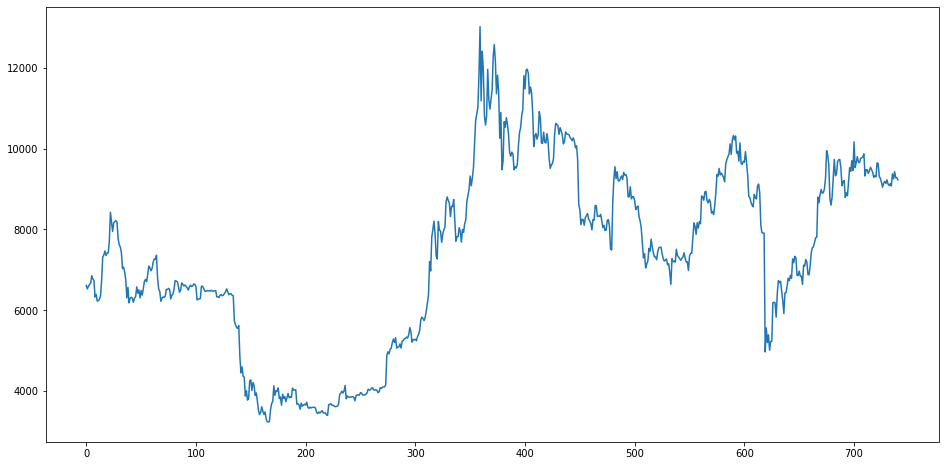

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,6614.180176
1,2018-07-03,6529.589844
2,2018-07-04,6597.549805
3,2018-07-05,6639.140137
4,2018-07-06,6673.500000


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0467
Epoch 2/5
8/8 - 1s - loss: 0.0120
Epoch 3/5
8/8 - 1s - loss: 0.0076
Epoch 4/5
8/8 - 2s - loss: 0.0043
Epoch 5/5
8/8 - 1s - loss: 0.0038


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0025
Loss: 0.0024540992453694344


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[ 8568.206 ],
       [ 6983.9717],
       [ 6576.134 ],
       [ 6560.477 ],
       [ 6631.8926],
       [ 6527.7256],
       [ 4488.1724],
       [ 3758.8894],
       [ 5290.3057],
       [ 6599.9375],
       [ 6473.376 ],
       [ 3419.0183],
       [ 9433.233 ],
       [11745.323 ],
       [ 8466.143 ],
       [ 8649.449 ],
       [ 7048.428 ],
       [ 3467.2124],
       [ 3429.9111],
       [ 3468.0469],
       [ 6504.2314],
       [ 3655.8486],
       [ 3726.576 ],
       [ 3900.227 ],
       [ 6427.1963],
       [ 3551.3145],
       [ 3497.015 ],
       [ 6671.7446],
       [ 8591.711 ],
       [ 5573.478 ],
       [ 3464.565 ],
       [ 6945.2876],
       [ 5876.3613],
       [ 6763.4087],
       [ 4409.482 ],
       [ 3823.4568],
       [ 6606.8125],
       [ 6697.704 ],
       [ 3812.8525],
       [ 3650.9229],
       [ 6672.4487],
       [ 6630.0234],
       [ 3719.6108],
       [ 5271.173 ],
       [ 9904.787 ],
       [ 3805.707 ],
       [ 4830.0825],
       [ 7055

In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,8568.206055
1,6983.971680
2,6576.133789
3,6560.477051
4,6631.892578
...,...
73,6658.786133
74,6613.499512
75,7190.649414
76,6576.776855


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[ 8994.488281],
       [ 6300.859863],
       [ 6480.379883],
       [ 6334.27002 ],
       [ 6446.470215],
       [ 6388.439941],
       [ 4214.671875],
       [ 3847.175781],
       [ 5505.283691],
       [ 6596.109863],
       [ 5738.350098],
       [ 3690.188232],
       [10855.37109 ],
       [11215.4375  ],
       [ 8145.857422],
       [ 9320.352539],
       [ 6792.830078],
       [ 3521.060791],
       [ 3648.430664],
       [ 3620.810791],
       [ 6371.27002 ],
       [ 3313.677246],
       [ 3630.675293],
       [ 3963.070557],
       [ 5648.029785],
       [ 3999.820557],
       [ 4014.182617],
       [ 6502.589844],
       [ 8742.958008],
       [ 6174.528809],
       [ 3545.864746],
       [ 7260.060059],
       [ 4602.169922],
       [ 7343.895508],
       [ 4139.87793 ],
       [ 3502.656006],
       [ 6596.540039],
       [ 6281.200195],
       [ 4048.72583 ],
       [ 3923.918701],
       [ 6274.580078],
       [ 6595.410156],
       [ 3854.35791 ],
       [ 53

In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,8568.206055,8994.488281
1,6983.971680,6300.859863
2,6576.133789,6480.379883
3,6560.477051,6334.270020
4,6631.892578,6446.470215
...,...,...
73,6658.786133,6625.560059
74,6613.499512,6721.979980
75,7190.649414,7978.309082
76,6576.776855,6474.750000


In [16]:
lstm_model.save("../models/BTC_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[11951.742 ],
       [12039.546 ],
       [12161.385 ],
       [12286.475 ],
       [12377.857 ],
       [12440.233 ],
       [12473.38  ],
       [12451.483 ],
       [12416.453 ],
       [12305.918 ],
       [12154.946 ],
       [12036.736 ],
       [11925.525 ],
       [11853.87  ],
       [11791.296 ],
       [11714.882 ],
       [11638.427 ],
       [11541.162 ],
       [11441.345 ],
       [11342.334 ],
       [11222.193 ],
       [11101.687 ],
       [10986.961 ],
       [10880.896 ],
       [10804.106 ],
       [10761.82  ],
       [10751.061 ],
       [10773.4375],
       [10820.454 ],
       [10917.295 ],
       [11032.698 ],
       [11170.99  ],
       [11327.312 ],
       [11476.971 ],
       [11606.289 ],
       [11721.016 ],
       [11816.25  ],
       [11877.588 ],
       [11880.363 ],
       [11856.427 ],
       [11816.835 ],
       [11759.383 ],
       [11703.315 ],
       [11671.892 ],
       [11648.943 ],
       [11607.099 ],
       [11555.806 ],
       [11510

In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-07-07,11450.846680
371,2019-07-08,12285.958010
372,2019-07-09,12573.812500
373,2019-07-10,12156.512700
374,2019-07-11,11358.662110
...,...,...
736,2020-07-07,9252.277344
737,2020-07-08,9428.333008
738,2020-07-09,9277.967773
739,2020-07-10,9278.807617


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-07-07,11450.846680,11951.742188
371,2019-07-08,12285.958010,12039.545898
372,2019-07-09,12573.812500,12161.384766
373,2019-07-10,12156.512700,12286.474609
374,2019-07-11,11358.662110,12377.857422
...,...,...,...
736,2020-07-07,9252.277344,9753.715820
737,2020-07-08,9428.333008,9755.223633
738,2020-07-09,9277.967773,9760.420898
739,2020-07-10,9278.807617,9762.821289


In [23]:
forecast_data.to_csv("../data/predictions/BTC.csv")

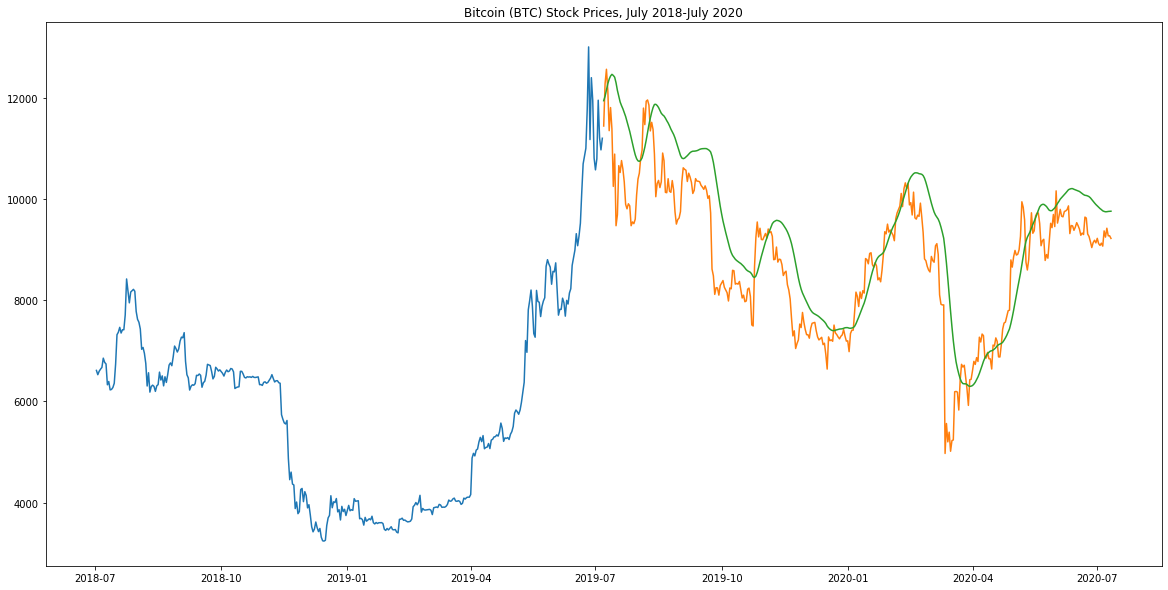

In [24]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Bitcoin (BTC) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/BTC.png")